<a href="https://colab.research.google.com/github/SergeyMitrofanov88/_Hydro_Practical_works/blob/main/Hydro_PW_%E2%84%966_true.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Источники**

**Учебное пособие:** https://www.researchgate.net/publication/364305910_OSNOVY_RASCETOV_GIDROENERGETICESKIH_REZIMOV_GES_V_ENERGOSISTEME_BASIS_OF_CALCULATION_OF_HYDROPOWER_MODES_OF_HPP_IN_THE_POWER_SYSTEM

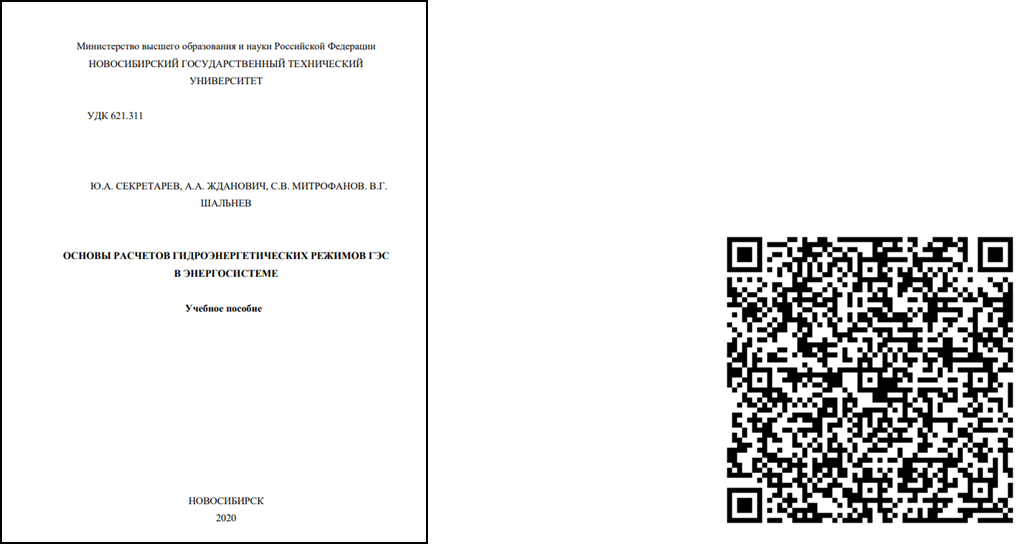

**Учебно-методический курс:**

https://dispace.edu.nstu.ru/didesk/course/show/10047

#**Водно-энергетический расчёт**

##Теоретическая часть

ВЭР, в рамках данной лабораторной работы, ведется на основании данных по маловодному году. Поэтому
для расчета необходим гидрограф маловодного года расчетной обеспеченности.

В каждый заданный промежуток времени необходимо подбирать
такой расход ГЭС для каждого месяца, чтобы в сочетании с соответ-
ствующим ему напором эти параметры обеспечивали заданную по
условиям задачи мощность. Для решения этой задачи обычно задается
допустимая погрешность расчета, равная ±5 %.

Для определения месяца начала сработки водохранилища необходимо рассчитать мощность, вырабатываемую на бытовом стоке Nбыт ,
которая рассчитывается по формуле:

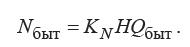

и сравнить ее с заданным
значением гарантированной мощности Nгар.

Первый месяц **после окончания половодья**, в котором выполняется данное условие, и будет началом сработки водохранилища:

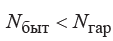

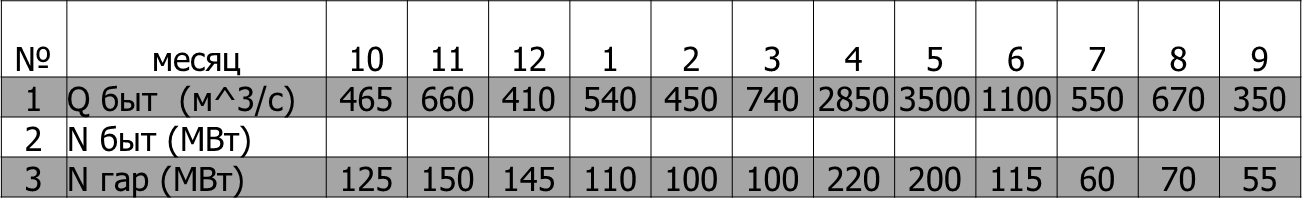

Далее расчет ведем по месяцам. Для каждого месяца составляем
уравнение водного баланса и считаем мощность ГЭС:

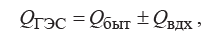

где «–›› характеризует период наполнения водохранилища, «+» – период сработки.

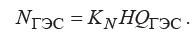

При проведении ВЭР необходимо соблюдать некоторые общие
требования.
1. Сработка водохранилища начинается с НПУ.
2. Минимальная отметка верхнего бьефа, достигнутая при сработке, является УМО.
3. Если при наполнении водохранилища его отметка на последнем этапе не достигла НПУ, необходимо уменьшить гарантированную мощность, выдаваемую в январе и декабре. И, наоборот, при
превышении отметки НПУ на последнем этапе наполнения надо
увеличивать гарантированную мощность января и декабря до тех
пор, пока на последнем этапе расчета отметка верхнего бьефа не
составит НПУ.

При сработке необходимо соблюдать требование Nгэс > Nгар .
На этом основании для каждого месяца важно увязать два параметра: DVвдх и Nгэс, т. е. понять, сколько нужно использовать воды из во-
дохранилища в каждом месяце, чтобы соблюдать это требование. По-
этому расчет ведется методом подбора Qвдх.

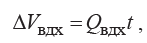

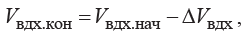

а соответствующая ему отметка верхнего бьефа – по кривой связи

Напор определяется по формуле:

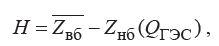

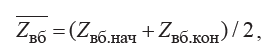

где Zвб.нач – начальная отметка верхнего бьефа на расчетном интервале; Zвб.кон – конечная отметка верхнего бьефа на расчетном интервале, которая определяется по кривой связи верхнего бьефа Zвб=f (Vвдх) в зависимости от израсходованного объема водохранилища.

При известных QГЭС и H рассчитывается мощность ГЭС. Полученная NГЭС сравнивается с соответствующей заданной гарантированной мощностью. Если вырабатываемая на ГЭС мощность укладывается в заданный коридор погрешности, то расчет идет дальше. Если мощность ГЭС недостаточна
либо избыточна, расчет повторяется при другом значении Qвдх .
Конечный уровень водохранилища в последнем интервале времени расчета должен удовлетворять условию равенства начальному,
т. е. НПУ для годичного регулирования стока реки. Если этого не происходит, корректируем гарантированную мощность января и декабря,
с тем чтобы добиться наполнения водохранилища до НПУ в последнем
месяце наполнения. При корректировке Nгар весь расчет производится заново.
ВЭФ удобно представлять в табличной форме.

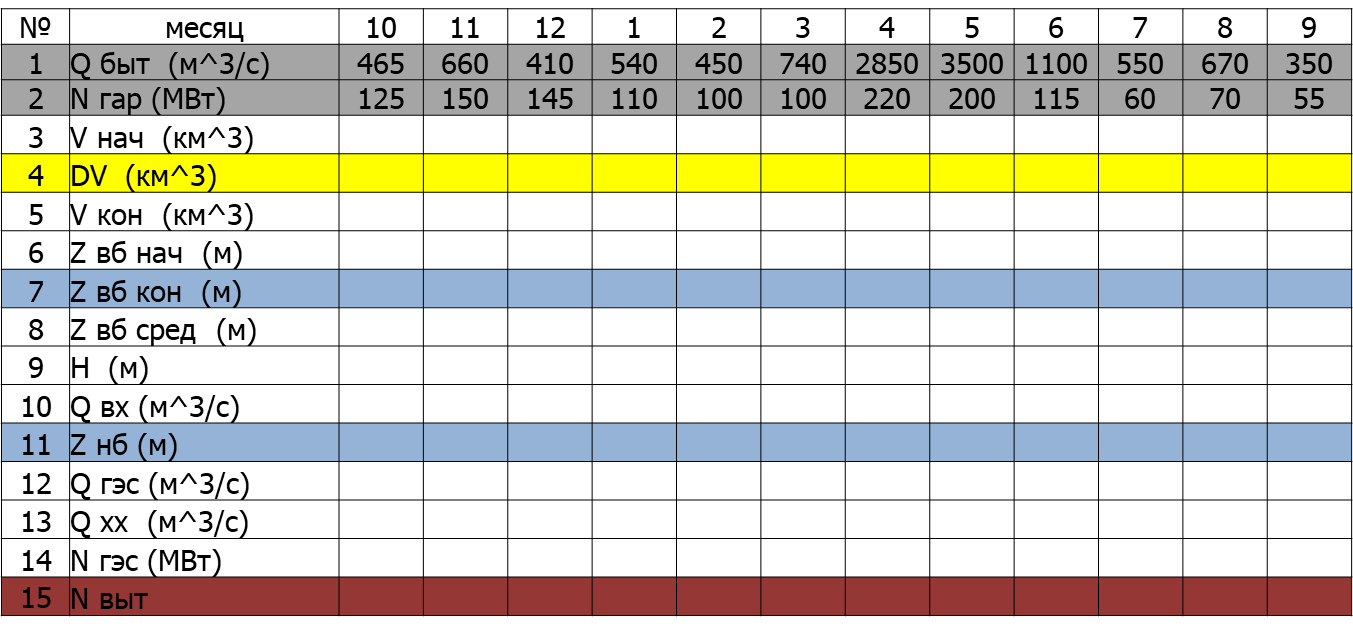

На основании полученного расчета строится график сработки
и наполнения водохранилища, который показывает изменение отметки
верхнего бьефа в течение расчетного периода Zвб=f(t) . Надо сказать,
что эти графики представляют большую ценность при регулировании
стока реки, поскольку служат основой диспетчерского регулирования
ГЭС.

##Решение

1. Исходные данные (гидрограф и ряд гарантированных мощностей)

In [ ]:
# Вариант 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Qбыт, м^3/c": [540, 450, 740, 2850, 3500, 1100, 750, 630, 450, 465, 560, 410],
    "Nгар, МВт": [120, 130, 135, 220, 190, 150, 85, 100, 70, 140, 150, 130]
}
#Характеристика нижнего бъефа
data1 = {
    "Zнб, м": [81, 83, 85, 87, 89, 91],
    "Q, м^3/с": [100, 460, 1200, 2250, 3800, 5100]
}

#Характеристика верхнего бъефа
data2 = {
    "Zвб, м": [87, 89, 91, 93, 95, 97, 99, 101, 103],
    "V, км^3": [0.1, 0.4, 0.9, 2.3, 4.6, 8.8, 14.6, 21, 29.3]
}

df2 = pd.DataFrame(data2)
df1 = pd.DataFrame(data1)
df = pd.DataFrame(data)
df.name = "Исходные данные"
NPU = 102

2. Кривые связи Zвб = f(Vвд), Zнб = f(Qнб) (построить полирномы по исходным данным)

Уравнение полинома для Q, м3/с:
           3             2
1.169e-10 x - 1.146e-06 x + 0.004825 x + 80.72


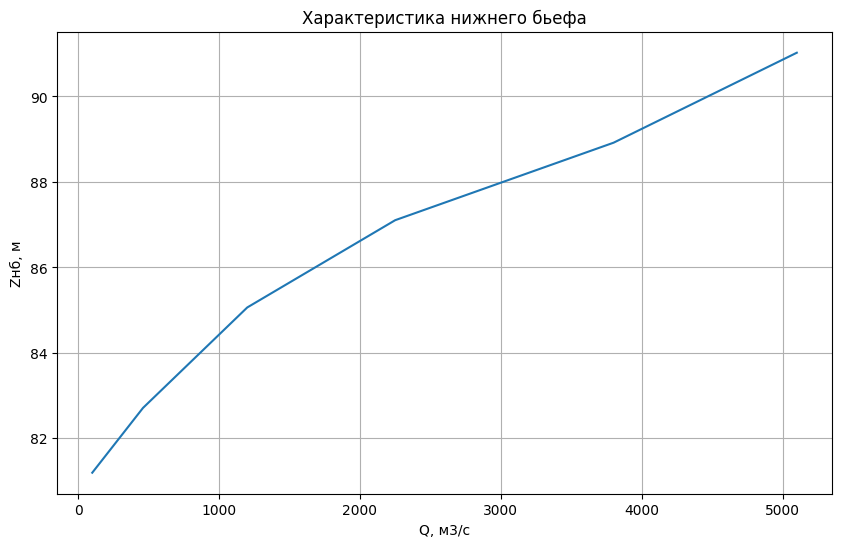

In [ ]:
X = np.array(df1["Q, м^3/с"])
Y = np.array(df1["Zнб, м"])

poly_fit_X = np.polyfit(X, Y, 3)
poly_X = np.poly1d(poly_fit_X)

print("Уравнение полинома для Q, м3/с:")
print(poly_X)

plt.figure(figsize=(10, 6))
plt.plot(X, poly_X(X))

plt.xlabel('Q, м3/с')
plt.ylabel('Zнб, м')
plt.title('Характеристика нижнего бьефа')
plt.grid(True)
plt.show()

Уравнение полинома для V, км3:
          2
-0.01872 x + 0.9955 x + 89.29


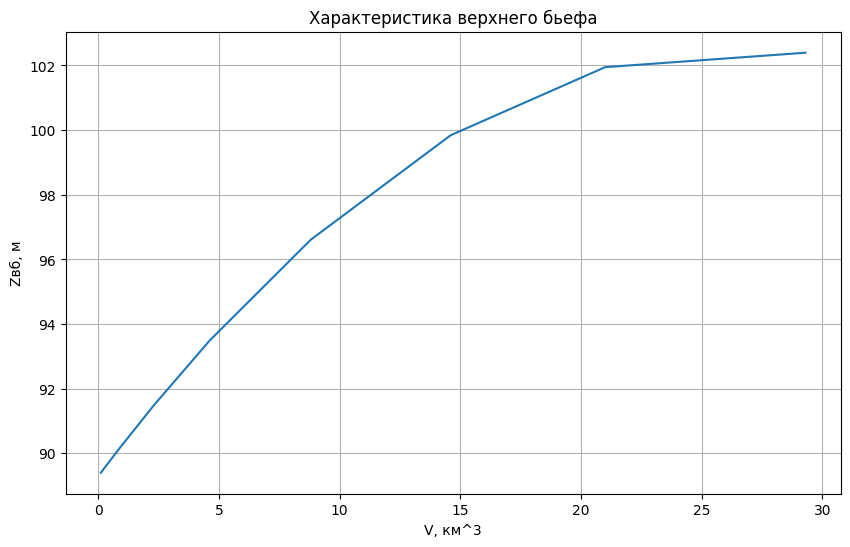

In [ ]:
X2 = np.array(df2["V, км^3"])
Y2 = np.array(df2["Zвб, м"])

poly_fit_X2 = np.polyfit(X2, Y2, 2)
poly_X2 = np.poly1d(poly_fit_X2)

print("Уравнение полинома для V, км3:")
print(poly_X2)

plt.figure(figsize=(10, 6))
plt.plot(X2, poly_X2(X2))

plt.xlabel('V, км^3')
plt.ylabel('Zвб, м')
plt.title('Характеристика верхнего бьефа')
plt.grid(True)
plt.show()

3. Этап определения месяца начала сработки

In [ ]:
#По характеристике нижнего бьефа находятся значения Znb через уравнение построенного полинома
Q = df["Qбыт, м^3/c"]
Znb = poly_X(Q)
Znb

array([83.00749351, 82.66763476, 83.70798992, 87.86566497, 88.5776779 ,
       84.79392109, 83.74110626, 83.33185295, 82.66763476, 82.72537593,
       83.08089483, 82.51147754])

In [ ]:
#Нахождение мощности, вырабатываемую на бытовом стоке Nбыт
Nbit = 8.5 * (NPU - Znb) * Q /1000
Nbit

0      87.175605
1      73.946297
2     115.056743
3     342.404266
4     399.314082
5     160.876838
6     116.400448
7      99.967927
8      73.946297
9      76.182952
10     90.054941
11     67.917501
Name: Qбыт, м^3/c, dtype: float64

In [ ]:
new_data1 = {
    "Q, м^3/с": Q,
    "Zнб, м": Znb,
    "Nбыт, МВт": Nbit,
    "Nгар, МВт": [120, 130, 135, 220, 190, 150, 85, 100, 70, 140, 150, 130]
}
new_df1 = pd.DataFrame(new_data1)
#10 месяц первый по условию Nбыт<Nгар
new_data2 = {
    "Месяц": [10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "Q, м^3/с": [465, 560, 410, 540, 450, 740, 2850, 3500, 1100, 750, 630, 450],
    "Zнб, м": [82.72537593, 83.08089483, 82.51147754, 83.00749351, 82.66763476, 83.70798992, 87.86566497, 88.5776779, 84.79392109, 83.74110626, 83.33185295, 82.66763476],
    "Nбыт, МВт": [76.182952, 90.054941, 67.917501, 87.175605, 73.946297, 115.056743, 342.404266, 399.314082, 160.876838, 116.400448, 99.967927, 73.946297],
    "Nгар, МВт": [140, 150, 130, 120, 130, 135, 220, 190, 150, 85, 100, 70]
}
new_df2 = pd.DataFrame(new_data2)
new_df2

,Месяц,"Q, м^3/с","Zнб, м","Nбыт, МВт","Nгар, МВт"
0,10,465,82.725376,76.182952,140
1,11,560,83.080895,90.054941,150
2,12,410,82.511478,67.917501,130
3,1,540,83.007494,87.175605,120
4,2,450,82.667635,73.946297,130
5,3,740,83.707990,115.056743,135
6,4,2850,87.865665,342.404266,220
7,5,3500,88.577678,399.314082,190
8,6,1100,84.793921,160.876838,150
9,7,750,83.741106,116.400448,85


4. Водно-энергетический расчёт с подбором DVвдхр вручную (таблица pandas)

In [ ]:
poly_fit_X3 = np.polyfit(Y2, X2, 2)
poly_X3 = np.poly1d(poly_fit_X3)
Vnach = poly_X3(NPU) * (10**9)
Vnach = 21.3 *(10**9)  # Начальное значение объема
#      1    2     3      4    5    6       7     8   9      10    11 12
DV = [1.3, 1.28, 1.34, 0.85, 1.3, 0.82, -2.45,  -4.55,  0.5, -0.4,   0.09, -0.065]
Vnach1 = []
Vkon1 = []
for i, d in enumerate(DV):
    Vkon = Vnach - d * (10**9)
    Vnach1.append(Vnach)
    Vkon1.append(Vkon)
    Vnach = Vkon
Vnach_1 = [value / 10**9 for value in Vnach1]
Vkon_1 = [value / 10**9 for value in Vkon1]
ZvbNach = poly_X2(Vnach_1)
ZvbKon = poly_X2(Vkon_1)
ZvbSred = [(ZvbNach[i] + ZvbKon[i]) / 2 for i in range(len(ZvbNach))]
t = [31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30]
Qvdh = []
for i in range(len(DV)):
    Qvdh.append(DV[i] * (10**9) / (t[i] * 24 * 60 * 60))
Qges = Qvdh + new_df2['Q, м^3/с'].values
Znb = poly_X(Qges)
H = ZvbSred - Znb
Nges = 8.5 * Qges * H /1000
datasrav = {
    "Nгэс, МВт": Nges,
    "Nгар, МВт": new_df2['Nгар, МВт'],
    "Vнач, км^3": Vnach_1,
    "Vкон, км^3": Vkon_1
}
srav = pd.DataFrame(datasrav)
srav

,"Nгэс, МВт","Nгар, МВт","Vнач, км^3","Vкон, км^3"
0,141.301233,140,21.30,20.000
1,151.169407,150,20.00,18.720
2,130.817905,130,18.72,17.380
3,121.717179,120,17.38,16.530
4,131.359612,130,16.53,15.230
5,135.944789,135,15.23,14.410
6,221.760747,220,14.41,16.860
7,229.938614,190,16.86,21.410
8,183.338974,150,21.41,20.910
9,95.668119,85,20.91,21.310


In [ ]:
end_data = {
    "Месяц": new_df2['Месяц'],
    "Q, м3/c": new_df2['Q, м^3/с'],
    "Nбыт, МВт": new_df2['Nбыт, МВт'],
    "Nгар, МВт": new_df2['Nгар, МВт'],
    "Vнач, км^3": srav['Vнач, км^3'],
    "Vкон, км^3": srav['Vкон, км^3'],
    "dV, км3": DV,
    "Zвбнач, м": ZvbNach,
    "Zвбкон, м": ZvbKon,
    "Zвбсред, м": ZvbSred,
    "Qвдх, м3/c": Qvdh,
    "Qгэс, м3/c": Qges,
    "Zнб, м": Znb,
    "H, м": H,
    "Nгэс, МВт": Nges
}
new_df3 = pd.DataFrame(end_data)
new_df3

,Месяц,"Q, м3/c","Nбыт, МВт","Nгар, МВт","Vнач, км^3","Vкон, км^3","dV, км3","Zвбнач, м","Zвбкон, м","Zвбсред, м","Qвдх, м3/c","Qгэс, м3/c","Zнб, м","H, м","Nгэс, МВт"
0,10,465,76.182952,140,21.30,20.000,1.300,102.004742,101.715762,101.860252,485.364397,950.364397,84.368357,17.491895,141.301233
1,11,560,90.054941,150,20.00,18.720,1.280,101.715762,101.369404,101.542583,493.827160,1053.827160,84.666347,16.876236,151.169407
2,12,410,67.917501,130,18.72,17.380,1.340,101.369404,100.941085,101.155244,500.298686,910.298686,84.248330,16.906914,130.817905
3,1,540,87.175605,120,17.38,16.530,0.850,100.941085,100.634540,100.787813,317.353644,857.353644,84.085640,16.702172,121.717179
4,2,450,73.946297,130,16.53,15.230,1.300,100.634540,100.113383,100.373962,518.837803,968.837803,84.422817,15.951145,131.359612
5,3,740,115.056743,135,15.23,14.410,0.820,100.113383,99.752109,99.932746,306.152927,1046.152927,84.644824,15.287922,135.944789
6,4,2850,342.404266,220,14.41,16.860,-2.450,99.752109,100.756764,100.254437,-945.216049,1904.783951,86.557608,13.696829,221.760747
7,5,3500,399.314082,190,16.86,21.410,-4.550,100.756764,102.026291,101.391528,-1698.775388,1801.224612,86.373078,15.018450,229.938614
8,6,1100,160.876838,150,21.41,20.910,0.500,102.026291,101.924692,101.975492,192.901235,1292.901235,85.292631,16.682861,183.338974
9,7,750,116.400448,85,20.91,21.310,-0.400,101.924692,102.006720,101.965706,-149.342891,600.657109,83.227773,18.737933,95.668119


5. График сработки-наполнения водохранилища

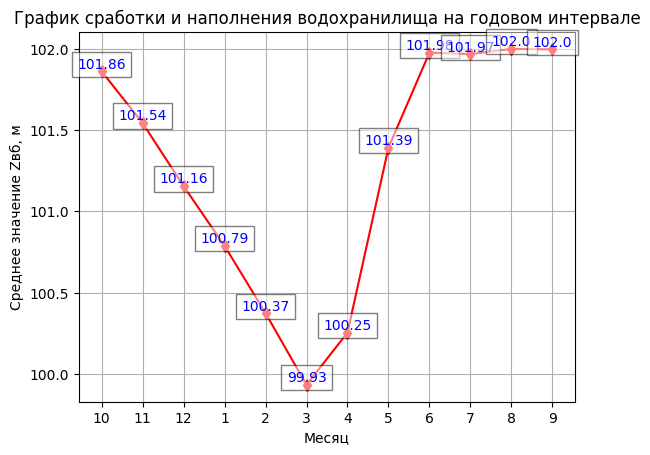

In [ ]:
plt.plot(new_df3.index, new_df3['Zвбсред, м'], marker='d', color='r')
plt.xticks(new_df3.index, new_df3['Месяц'])
plt.xlabel('Месяц')
plt.ylabel('Среднее значение Zвб, м')
plt.title('График сработки и наполнения водохранилища на годовом интервале')
plt.grid(True)

# Добавление округленных значений точек на график с учетом прямоугольника вокруг текста
for i, txt in enumerate(new_df3['Zвбсред, м']):
    rounded_txt = round(txt, 2)  # округление значения до двух знаков после запятой
    plt.text(new_df3.index[i], txt, str(rounded_txt), ha='center', va='bottom', color='blue', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [ ]:
Eges = Nges*t*24
np.sum(Eges)

1256706.0184738587

**Вывод:**
были рассмотрены основные этапы и требования для проведения вычислительно-экспериментальной работы по определению гидрографа маловодного года и расчету обеспеченности водохранилища. Описанные шаги включают оценку мощности, проведение водного баланса, определение начала сработки водохранилища, а также методы расчета напора и мощности гидроэнергетической установки (ГЭС). Особое внимание уделяется соблюдению требований к началу сработки, уровням отметок водохранилища, и соблюдению гарантированной мощности.
Суммарная вырабатываемая энергия за период сработки-наполнения водохранилища ГЭС равна 1256706,018 МВт*ч